# Cross-country analysis of the Covid-19 outbreak

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

Imports and set magics:

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

We collect data from the "2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE", found on GitHub on the following link: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series. We use three datasets: The number of confirmed cases, the number of cases resulting in death and the number of cases recovered.

In [140]:
# a. load data
df_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
df_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

# b. drop columns
dfs = [df_confirmed, df_deaths, df_recovered]
drop_these = ['Lat', 'Long', 'Province/State']
for df in dfs:
    df.drop(drop_these, axis=1, inplace=True)
    
# c. group by country
df_confirmed = df_confirmed.groupby('Country/Region').sum()
df_deaths = df_deaths.groupby('Country/Region').sum()
df_recovered = df_recovered.groupby('Country/Region').sum()

The three datasets now look like alike. The dataset of confirmed cases looks like this:

In [141]:
df_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
Albania,0,0,0,0,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
Algeria,0,0,0,0,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
Andorra,0,0,0,0,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


**Convert to long format:** We convert the datasets to long format in order to be able to make an interactive plot. The function `long()` is defined in the file `dataproject.py`.

In [142]:
deaths_long = dataproject.long(df_deaths, 'deaths')
recovered_long = dataproject.long(df_recovered, 'recovered')
confirmed_long = dataproject.long(df_confirmed, 'confirmed')

# Explore data set

**General function to plot**

In [148]:
def plot_covid(confirmed, deaths, recovered, dataset, country_region): 
    
    if dataset == 'Confirmed':
        df = confirmed
        y = 'confirmed'
    elif dataset == 'Deaths':
        df = deaths
        y = 'deaths'
    else:
        df = recovered
        y = 'recovered'
    
    I = df['Country/Region'] == country_region
    ax = df.loc[I,:].plot(x='date', y=y, style='-o')

**Interactive plot with all countries and regions**

In [149]:
widgets.interact(plot_covid, 
    
    confirmed = widgets.fixed(confirmed_long),
    deaths = widgets.fixed(deaths_long),
    recovered = widgets.fixed(recovered_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Confirmed','Deaths','Recovered']),
    country_region = widgets.Dropdown(description='Country/Region', 
                                    options=confirmed_long['Country/Region'].unique())
                 
); 

interactive(children=(Dropdown(description='Dataset', options=('Confirmed', 'Deaths', 'Recovered'), value='Con…

Blah blah blah, kina har mange recovered, andre lande måler ikke recovered osv.

**Interactive plot with top countreis**

In [145]:
total_deaths = deaths_long.loc[deaths_long['date']==df_deaths.columns[-1]]
top_countries = total_deaths.sort_values(by = 'deaths', ascending=False).head(10)['Country/Region']

In [146]:
widgets.interact(plot_covid, 
    
    confirmed = widgets.fixed(confirmed_long),
    deaths = widgets.fixed(deaths_long),
    recovered = widgets.fixed(recovered_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Confirmed','Deaths','Recovered']),
    country_region = widgets.Dropdown(description='Country/Region', 
                                    options=top_countries)
                 
); 

interactive(children=(Dropdown(description='Dataset', options=('Confirmed', 'Deaths', 'Recovered'), value='Con…

## Employment data

**Read the employment data** in ``RAS200.xlsx`` and **clean it** removing and renaming columns:

In [126]:
# a. load
empl = pd.read_excel('RAS200.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
empl.drop(drop_these, axis=1, inplace=True)

# c. rename columns
empl.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

The dataset now looks like this:

In [127]:
empl.head()

,municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6


**Remove all rows which are not municipalities**:

In [128]:
empl = dataproject.only_keep_municipalities(empl)
empl.head()

AttributeError: module 'dataproject' has no attribute 'only_keep_municipalities'

**Convert the dataset to long format**:

In [129]:
# a. rename year columns
mydict = {str(i):f'employment{i}' for i in range(2008,2018)}
empl.rename(columns = mydict, inplace=True)

# b. convert to long
empl_long = pd.wide_to_long(empl, stubnames='employment', i='municipality', j='year').reset_index()

# c. show
empl_long.head()

,municipality,year,employment
0,All Denmark,2008,76.0
1,Region Hovedstaden,2008,75.8
2,Province Byen København,2008,73.4
3,Copenhagen,2008,72.5
4,Frederiksberg,2008,75.6


## Income data

**Read the income data** in ``INDKP101.xlsx`` and **clean it**:

In [130]:
# a. load
inc = pd.read_excel('INDKP101.xlsx', skiprows=2)

# b. drop and rename columns
inc.drop([f'Unnamed: {i}' for i in range(3)], axis=1, inplace=True)
inc.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)

# c. drop rows with missing
inc.dropna(inplace=True)

# d. remove non-municipalities
inc = dataproject.only_keep_municipalities(inc)

# e. convert to long
inc.rename(columns = {str(i):f'income{i}' for i in range(1986,2018)}, inplace=True)
inc_long = pd.wide_to_long(inc, stubnames='income', i='municipality', j='year').reset_index()

# f. show
inc_long.head(5)

AttributeError: module 'dataproject' has no attribute 'only_keep_municipalities'

> **Note:** The function ``dataproject.only_keep_municipalities()`` is used on both the employment and the income datasets.

## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [63]:
def plot_empl_inc(empl,inc,dataset,municipality): 
    
    if dataset == 'Employment':
        df = empl
        y = 'employment'
    else:
        df = inc
        y = 'income'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

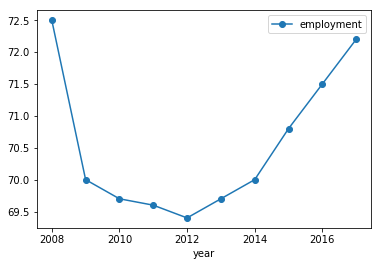

In [64]:
widgets.interact(plot_empl_inc, 
    
    empl = widgets.fixed(empl_long),
    inc = widgets.fixed(inc_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Employment','Income']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=empl_long.municipality.unique())
                 
); 

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [115]:
# Total deaths are the number of deaths at the latest date
total_deaths = deaths_long.loc[deaths_long['date']==df_deaths.columns[-1]]
total_deaths.sort_values(by = 'deaths', ascending=False).head(10)

,Country/Region,date,variable,deaths,diff
11043,Italy,3/25/20,deaths,7503,683.0
11109,Spain,3/25/20,deaths,3647,839.0
10995,China,3/25/20,deaths,3285,4.0
11039,Iran,3/25/20,deaths,2077,143.0
11020,France,3/25/20,deaths,1333,231.0
11124,US,3/25/20,deaths,942,236.0
11128,United Kingdom,3/25/20,deaths,466,43.0
11076,Netherlands,3/25/20,deaths,357,80.0
11024,Germany,3/25/20,deaths,206,49.0
10978,Belgium,3/25/20,deaths,178,56.0


ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.